# Broker Dealer Series

We will propose a relevant and exhaustive market risk analysis of a Broker Dealer.

## Import Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import Series_Functions as sf
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [15, 8]

## Download the Data

In [2]:
ticker = 'IAI'
prices = sf.get_data(ticker)

We compute the returns

In [3]:
returns = sf.get_returns(prices)

We plot the returns for the insurance

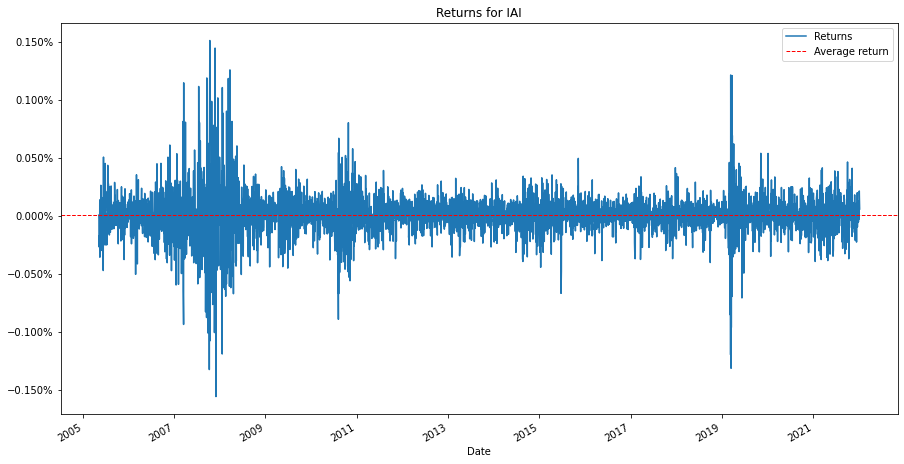

In [4]:
sf.plot_returns(returns, ticker)

## Estimation of the VaR

### Non parametric method

In [5]:
VaR_NonParam = sf.weighted_hs_var(returns=returns, confidence_level=95)

VaR au niveau de confiance 95% : 0.0255


### Parametric method